In [1]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
import numpy as np
np.random.seed(0)

x_train = pd.read_csv('/Users/taraapple/Desktop/train.csv')
label = x_train['label']
x_train.drop(['label'], inplace = True, axis = 1 )

x_test = pd.read_csv('/Users/taraapple/Desktop/test.csv')
x_train = x_train.values
y_train = label.values
x_test = x_test.values
x_train ,  y_train = shuffle(x_train, label , random_state=0)

Using TensorFlow backend.


In [2]:
print(x_train.shape)

(42000, 784)


the number of training examples = 42000
the number of classes = 10
Flattened Image dimentions = 784 x 1  
The number of occuranc of each class in the dataset = 1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64  



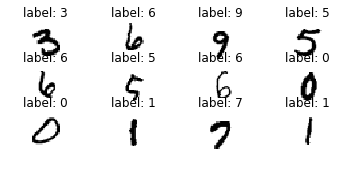

In [3]:
print("the number of training examples = %i" % x_train.shape[0])
print("the number of classes = %i" % len(np.unique(y_train)))
print("Flattened Image dimentions = %d x %d  " % (x_train.shape[1], 1)  )

print("The number of occuranc of each class in the dataset = %s " % label.value_counts(), "\n" )


X_train = x_train.reshape(-1, 28, 28).astype('float32')
images_and_labels = list(zip(X_train,  y_train))
for index, (image, label) in enumerate(images_and_labels[:12]):
    plt.subplot(5, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('label: %i' % label)

In [4]:
type(x_train)

numpy.ndarray

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout, Conv2D
from keras import regularizers

from keras.utils import np_utils

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print(x_train.shape )
print(x_train.shape )


y_train = np_utils.to_categorical(y_train)

model = Sequential()
model.add(Conv2D(1, kernel_size=1, padding="same",input_shape=(28, 28, 1), activation = 'relu'))
model.add(Flatten())


model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.1))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.1))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.1))


model.add(Dense(units=10, activation='softmax'))

(42000, 28, 28, 1)
(42000, 28, 28, 1)


In [6]:
from keras import optimizers

model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

In [7]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
x_train2 = np.array(x_train, copy=True) 
y_train2 = np.array(y_train, copy=True) 

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    fill_mode='nearest',
    validation_split = 0.2
    )



datagen.fit(x_train)

print(type(x_train))

earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='min')

validation_generator = datagen.flow(x_train2, y_train2, batch_size=60, subset='validation')
train_generator = datagen.flow(x_train2, y_train2, batch_size=60, subset='training')


history = model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    steps_per_epoch = len(train_generator) / 60,
                    validation_steps = len(validation_generator) / 60,
                    epochs = 300,
                    workers=-1, callbacks = [earlystopping])

<class 'numpy.ndarray'>
Epoch 1/300
10/9 [================================] - 1s 90ms/step - loss: 2.1882 - acc: 0.2850 - val_loss: 1.8662 - val_acc: 0.5556
Epoch 2/300
10/9 [================================] - 0s 19ms/step - loss: 1.4209 - acc: 0.5967 - val_loss: 0.8850 - val_acc: 0.7222
Epoch 3/300
10/9 [================================] - 0s 19ms/step - loss: 0.8987 - acc: 0.7117 - val_loss: 0.9255 - val_acc: 0.6611
Epoch 4/300
10/9 [================================] - 0s 18ms/step - loss: 0.7747 - acc: 0.7483 - val_loss: 0.3739 - val_acc: 0.9111
Epoch 5/300
10/9 [================================] - 0s 19ms/step - loss: 0.5526 - acc: 0.8183 - val_loss: 0.4999 - val_acc: 0.8444
Epoch 6/300
10/9 [================================] - 0s 19ms/step - loss: 0.5397 - acc: 0.8350 - val_loss: 0.4340 - val_acc: 0.8667
Epoch 7/300
10/9 [================================] - 0s 19ms/step - loss: 0.5061 - acc: 0.8383 - val_loss: 0.2567 - val_acc: 0.9333
Epoch 8/300
10/9 [===========================

10/9 [================================] - 0s 19ms/step - loss: 0.1962 - acc: 0.9450 - val_loss: 0.1242 - val_acc: 0.9556
Epoch 63/300
10/9 [================================] - 0s 18ms/step - loss: 0.1607 - acc: 0.9467 - val_loss: 0.1227 - val_acc: 0.9611
Epoch 64/300
10/9 [================================] - 0s 19ms/step - loss: 0.1972 - acc: 0.9433 - val_loss: 0.1156 - val_acc: 0.9556
Epoch 65/300
10/9 [================================] - 0s 19ms/step - loss: 0.2046 - acc: 0.9400 - val_loss: 0.2208 - val_acc: 0.9333
Epoch 66/300
10/9 [================================] - 0s 18ms/step - loss: 0.1696 - acc: 0.9417 - val_loss: 0.1174 - val_acc: 0.9500
Epoch 67/300
10/9 [================================] - 0s 19ms/step - loss: 0.1831 - acc: 0.9467 - val_loss: 0.1988 - val_acc: 0.9389
Epoch 68/300
10/9 [================================] - 0s 18ms/step - loss: 0.2171 - acc: 0.9283 - val_loss: 0.1417 - val_acc: 0.9556
Epoch 69/300
10/9 [================================] - 0s 19ms/step - loss:

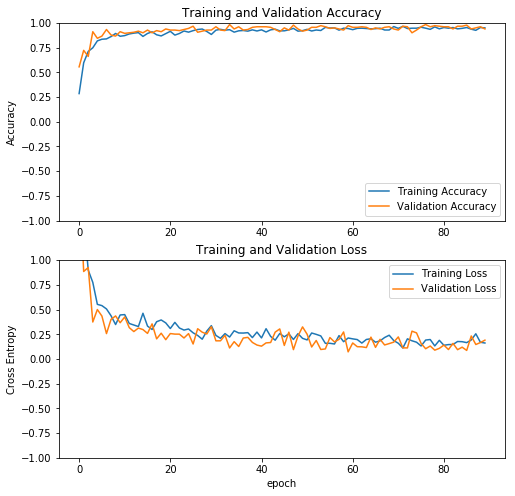

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([-1,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([-1,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()